In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load dataset
df = pd.read_csv('/content/Clean_dataset.csv')

In [4]:
# Define features and target for anxiety analysis
anxiety_features = [
    'GenHealth', 'MentalHealth', 'ExerAny2', 'HaveArthritis3', 'AdDepressionEver2'
]

In [6]:
anxiety_target_variable = 'HaveAnxiety'

# Create a new dataframe with relevant columns for anxiety analysis
selected_data_anxiety = df[anxiety_features].copy()

# Create a new column 'HaveAnxiety' based on conditions
selected_data_anxiety['HaveAnxiety'] = 0  # Initialize to 0
selected_data_anxiety.loc[
    (selected_data_anxiety['GenHealth'] == 'Good') |
    (selected_data_anxiety['MentalHealth'] == 'Good') |
    (selected_data_anxiety['ExerAny2'] == 'Yes') |
    (selected_data_anxiety['HaveArthritis3'] == 'Yes') |
    (selected_data_anxiety['AdDepressionEver2'] == 1),
    'HaveAnxiety'
] = 1

In [7]:
# Assuming 'HaveAnxiety' is the target column for anxiety analysis
anxiety_target = selected_data_anxiety[anxiety_target_variable]


In [9]:
import numpy as np

# Identify numeric and non-numeric columns for anxiety analysis
anxiety_numeric_features = df[anxiety_features].select_dtypes(include=np.number).columns
anxiety_non_numeric_features = df[anxiety_features].select_dtypes(exclude=np.number).columns


In [10]:
# Handle missing values and scaling for anxiety analysis
anxiety_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [11]:
anxiety_preprocessor = ColumnTransformer(
    transformers=[
        ('num', anxiety_numeric_transformer, anxiety_numeric_features),
        ('non_num', 'drop', anxiety_non_numeric_features)
    ]
)


In [12]:
# Transform the anxiety features
anxiety_features_scaled = anxiety_preprocessor.fit_transform(df[anxiety_features])


In [13]:
# Split the data into training and testing sets for anxiety analysis
X_train_anxiety, X_test_anxiety, y_train_anxiety, y_test_anxiety = train_test_split(
    anxiety_features_scaled, anxiety_target, test_size=0.2, random_state=42
)

In [14]:
# Train a RandomForestClassifier for anxiety analysis
model_anxiety = RandomForestClassifier(random_state=42)
model_anxiety.fit(X_train_anxiety, y_train_anxiety)


RandomForestClassifier(random_state=42)

In [15]:
# Make predictions on the test set for anxiety analysis
y_pred_anxiety = model_anxiety.predict(X_test_anxiety)

In [16]:
# Evaluate the model for anxiety analysis
accuracy_anxiety = accuracy_score(y_test_anxiety, y_pred_anxiety)
report_anxiety = classification_report(y_test_anxiety, y_pred_anxiety)
conf_matrix_anxiety = confusion_matrix(y_test_anxiety, y_pred_anxiety)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
print(f"Accuracy for Anxiety Analysis: {accuracy_anxiety}")
print("\nClassification Report for Anxiety Analysis:\n", report_anxiety)
print("\nConfusion Matrix for Anxiety Analysis:\n", conf_matrix_anxiety)


Accuracy for Anxiety Analysis: 0.8843719040182695

Classification Report for Anxiety Analysis:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6886
           1       0.88      1.00      0.94     52667

    accuracy                           0.88     59553
   macro avg       0.44      0.50      0.47     59553
weighted avg       0.78      0.88      0.83     59553


Confusion Matrix for Anxiety Analysis:
 [[    0  6886]
 [    0 52667]]


In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are your original data split
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_anxiety, y_train_anxiety)

# Now, use X_train_resampled and y_train_resampled for training


In [26]:
from sklearn.model_selection import GridSearchCV

# Assuming you have a RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [29]:
from sklearn.model_selection import cross_val_score

# we have a trained model (RandomForestClassifier)
cv_scores = cross_val_score(model_anxiety, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.51675374 0.51664688 0.51904536 0.51719921 0.5159762 ]
Mean CV Accuracy: 0.5171242773104054


In [30]:

# Visualize class separability using PCA for anxiety analysis
pca_anxiety = PCA(n_components=min(anxiety_features_scaled.shape[0], anxiety_features_scaled.shape[1]))
features_pca_anxiety = pca_anxiety.fit_transform(anxiety_features_scaled)



In [31]:
# Create a DataFrame with the reduced features and target for visualization
features_pca_df_anxiety = pd.DataFrame(features_pca_anxiety, columns=[f'PC{i}' for i in range(1, features_pca_anxiety.shape[1] + 1)])
features_pca_df_anxiety['Target'] = anxiety_target.values

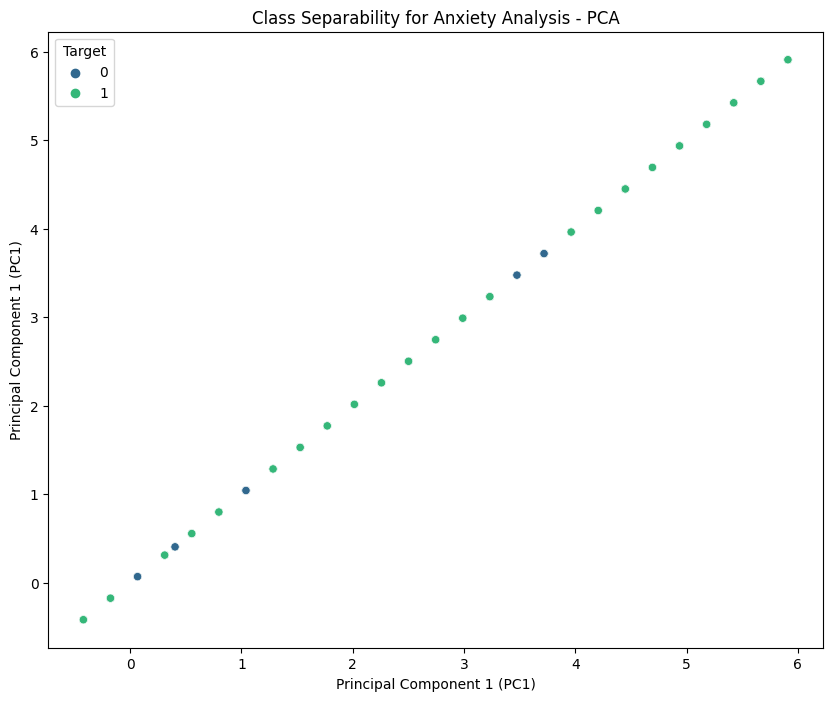

In [36]:
# Visualize class separability using a scatter plot for anxiety analysis
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC1', hue='Target', data=features_pca_df_anxiety, palette='viridis')
plt.title('Class Separability for Anxiety Analysis - PCA')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 1 (PC1)')
plt.show()


In [37]:
pip install flask

In [38]:
pip install joblib

In [39]:
from flask import Flask, request, jsonify
import joblib
from sklearn.preprocessing import LabelEncoder

In [ ]:
app = Flask(__name__)

In [40]:
#'model' is the name of anxiety prediction model
joblib.dump(model_anxiety, 'model_anxiety.pkl')

['model_anxiety.pkl']

In [42]:
import joblib

# Load the model
loaded_model = joblib.load('model_anxiety.pkl')


In [45]:
# Define a function for anxiety prediction
def predict_anxiety(input_data):
    try:
        # Assuming 'GenHealth' is a relevant feature
        input_features = input_data.get(['GenHealth', 'MentalHealth', 'ExerAny2', 'HaveArthritis3', 'AdDepressionEver2'], 0)

        # Convert 'AdDepressionEver2' to binary (0 or 1)
        input_features['AdDepressionEver2'] = input_features['AdDepressionEver2'].map({'Yes': 1, 'No': 0})

        # Create a new column 'HaveAnxiety' based on conditions
        input_features['HaveAnxiety'] = 0  # Initialize to 0
        input_features.loc[
            (input_features['GenHealth'] == 'Good') |
            (input_features['MentalHealth'] == 'Good') |
            (input_features['ExerAny2'] == 'Yes') |
            (input_features['HaveArthritis3'] == 'Yes') |
            (input_features['AdDepressionEver2'] == 1),
            'HaveAnxiety'
        ] = 1

        # Convert categorical columns to numerical using one-hot encoding
        input_features = pd.get_dummies(input_features, drop_first=True)

        # Make anxiety prediction
        anxiety_prediction = anxiety_model.predict(input_features)[0]

        return anxiety_prediction

    except Exception as e:
        return str(e)

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
